In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV, TSV, EXCEL File

> `pd.read_csv` - 콤마 세퍼레이티드 파일 CSV 읽기  

> `pd.read_table` - 텝 세퍼레이티드 파일 TSV 읽기 

> `pd.read_excel` - 엑샐 파일 읽기 

[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)는 
파일을 작성하는 양식의 일종인데, 
각각의 줄에 담는 데이타를 콤마를 기준으로 나누는 양식이다. 
CSV 양식으로 작성한 파일을 CSV 파일이라고 하는데,
판다스에서는 CSV 파일을 읽어 데이파프레임으로 전환하는 함수가 있다.
이 함수가 `pd.read_csv`이다. 

[TSV](https://en.wikipedia.org/wiki/Tab-separated_values)는 
파일을 작성하는 양식의 일종인데, 
각각의 줄에 담는 데이타를 텝 기준으로 나누는 양식이다. 
TSV 양식으로 작성한 파일을 TSV 파일이라고 하는데,
판다스에서는 TSV 파일을 읽어 데이파프레임으로 전환하는 함수가 있다.
이 함수가 `pd.read_table`이다. 

`pd.read_csv`과 `pd.read_table`은 기본적으로 같은 기능을 수행하는데, 읽고자 하는 파일이 콤마를 기준으로 데이타를 정렬했는지 아니면 텝을 기준으로 데이타를 정렬했는지 차이만 있다. 

`sep` 키워드를 이용하면, `pd.read_csv`를 이용 TSV 파일을 읽을 수 있고 반대로 `pd.read_table`을 이용 CSV 파일을 읽을 수 있다.

[pandas.read_csv 도큐먼트](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

[pandas.read_table 도큐먼트](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)

[pandas.read_excel 도큐먼트](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html)

In [7]:
if 1:
    df = pd.read_csv("./data/dow30/WMT.CSV")
elif 1:
    df = pd.read_table("./data/dow30/WMT.CSV", sep=',')
    
print(df.head())

         Date      Open      High       Low     Close  Adj Close   Volume
0  1972-08-25  0.063477  0.064697  0.063477  0.064453   0.039309  2508800
1  1972-08-28  0.064453  0.064941  0.064209  0.064209   0.039160   972800
2  1972-08-29  0.063965  0.063965  0.063477  0.063477   0.038714  1945600
3  1972-08-30  0.063477  0.063477  0.062988  0.063477   0.038714   409600
4  1972-08-31  0.062988  0.062988  0.062500  0.062500   0.038118   870400


# Change Index

> `index_col`  - 키워드

> `set_index`  - 메쏘드

In [10]:
if 1:
    df = pd.read_csv("./data/dow30/WMT.CSV", index_col='Date')
elif 1:
    df = pd.read_csv("./data/dow30/WMT.CSV").set_index('Date')
    
print(df.head())

                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
1972-08-25  0.063477  0.064697  0.063477  0.064453   0.039309  2508800
1972-08-28  0.064453  0.064941  0.064209  0.064209   0.039160   972800
1972-08-29  0.063965  0.063965  0.063477  0.063477   0.038714  1945600
1972-08-30  0.063477  0.063477  0.062988  0.063477   0.038714   409600
1972-08-31  0.062988  0.062988  0.062500  0.062500   0.038118   870400


# Read Specific Columns of CSV File

> `usecols` - 키워드

In [16]:
df = pd.read_csv("./data/dow30/WMT.CSV",
                 index_col='Date',
                 usecols=['Date', 'Adj Close', 'Volume']) 

print(df.head())

            Adj Close   Volume
Date                          
1972-08-25   0.039309  2508800
1972-08-28   0.039160   972800
1972-08-29   0.038714  1945600
1972-08-30   0.038714   409600
1972-08-31   0.038118   870400


# Change Column Name

> rename - 메쏘드 

> columns - 어트리뷰트 

In [20]:
if 1: 
    df = pd.read_csv("./data/dow30/WMT.CSV",
                 index_col='Date',
                 usecols=['Date', 'Adj Close', 'Volume']).rename(
    columns={'Adj Close': 'WMT', 'Volume': 'Vol'}) 
elif 1:
    df = pd.read_csv("./data/dow30/WMT.CSV",
                 index_col='Date',
                 usecols=['Date', 'Adj Close', 'Volume'])
    df.columns = ['WMT', 'Vol']

print(df.head())

                 WMT      Vol
Date                         
1972-08-25  0.039309  2508800
1972-08-28  0.039160   972800
1972-08-29  0.038714  1945600
1972-08-30  0.038714   409600
1972-08-31  0.038118   870400


# Read Specific Rows of CSV File

In [34]:
start = "2017-01-01"
end = "2017-12-31"
dates = pd.date_range(start, end) # <class 'pandas.tseries.index.DatetimeIndex'>
df_dates = pd.DataFrame(index=dates) # <class 'pandas.core.frame.DataFrame'>
print(df_dates.head())

df_temp = pd.read_csv("./data/dow30/WMT.CSV",
                      index_col="Date",
                      usecols=['Date', 'Adj Close', 'Volume']).rename(
    columns={'Adj Close': 'WMT', 'Volume': 'Vol'}) # <class 'pandas.core.frame.DataFrame'>
print(df_temp.head())

df = df_dates.join(df_temp).dropna()
# df = df_temp.join(df_dates).dropna() # 위와 다릅니다
print(df.head(20))
print(df.tail(20))

Empty DataFrame
Columns: []
Index: [2017-01-01 00:00:00, 2017-01-02 00:00:00, 2017-01-03 00:00:00, 2017-01-04 00:00:00, 2017-01-05 00:00:00]
                 WMT      Vol
Date                         
1972-08-25  0.039309  2508800
1972-08-28  0.039160   972800
1972-08-29  0.038714  1945600
1972-08-30  0.038714   409600
1972-08-31  0.038118   870400
                  WMT         Vol
2017-01-03  66.929802  10473200.0
2017-01-04  67.319717   7918000.0
2017-01-05  67.465942   7099200.0
2017-01-06  66.539886   9491100.0
2017-01-09  66.978539   8660600.0
2017-01-10  66.510643  10256500.0
2017-01-11  66.803078   6697600.0
2017-01-12  66.257187   6544900.0
2017-01-13  65.438354  10012500.0
2017-01-17  66.695847  13140200.0
2017-01-18  66.393661   7321500.0
2017-01-19  65.916008   6821100.0
2017-01-20  65.487099  12054700.0
2017-01-23  64.970451   7951400.0
2017-01-24  65.701561  10710600.0
2017-01-25  65.204407   8722900.0
2017-01-26  65.048439   6504100.0
2017-01-27  64.005402  13433600.0
201

# Plot Adj Close

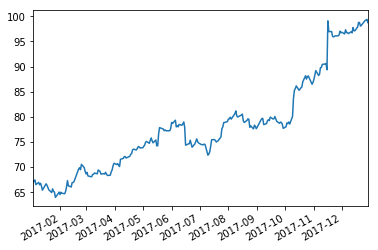

In [36]:
df["WMT"].plot()

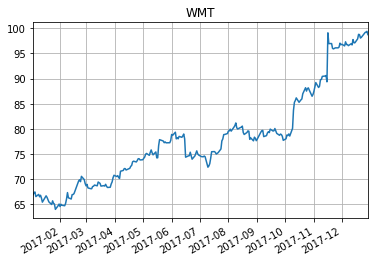

In [37]:
df["WMT"].plot(title='WMT', fontsize=10, grid=True)

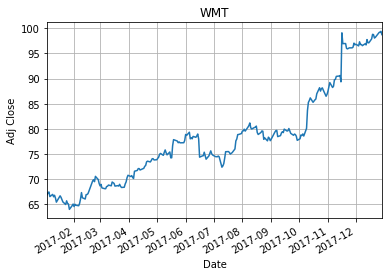

In [42]:
fig = plt.figure()
ax = plt.axes()
ax = df['WMT'].plot(title='WMT', fontsize=10, grid=True)
ax.set_xlabel("Date", fontsize=10)
ax.set_ylabel("Adj Close", fontsize=10) 
plt.show()

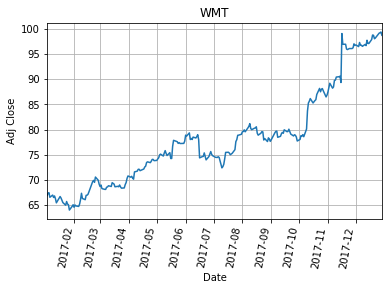

In [43]:
fig = plt.figure()
ax = plt.axes()
ax = df['WMT'].plot(title='WMT', fontsize=10, grid=True)
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close") 
for tick in ax.get_xticklabels():
    tick.set_rotation(80)
plt.show()